In [1]:
%autosave 0

Autosave disabled


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psi4
%matplotlib inline
plt.style.use('seaborn-talk')

In [3]:
#psi4.set_output_file('valence-diatoms.dat', False)
#psi4.set_memory('1000 MB')
#psi4.set_num_threads(2)

# Li$_2$ potential scan

In [3]:
Li2_geom = psi4.geometry("""
0 1
Li
Li 1 2.67328""")  # Li2 Re lit value

In [4]:
psi4.set_options({'reference':'rohf'})

# single-point energies at experimental re
eLi2_631, wfnLi2_631 = psi4.energy('scf/6-31g*', return_wfn=True)
eLi2_cc, wfnLi2_cc = psi4.energy('scf/cc-pvdz', return_wfn=True)

eLi2_631, eLi2_cc

(-14.866393278421494, -14.869505411765761)

In [6]:
r = 2.0
Li2zmat = "\n0 1\nLi\nLi 1 %s\n"
print(Li2zmat % r)


0 1
Li
Li 1 2.0



In [7]:
# rs (r values) internuclear separation
short = np.arange(1.2, 4.1, 0.1)
med = np.arange(5, 10, 1)
long = np.arange(10, 71, 5)

rs = np.hstack([short, med, long])
rs

array([  1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,   1.9,   2. ,
         2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,   2.8,   2.9,
         3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,   3.7,   3.8,
         3.9,   4. ,   5. ,   6. ,   7. ,   8. ,   9. ,  10. ,  15. ,
        20. ,  25. ,  30. ,  35. ,  40. ,  45. ,  50. ,  55. ,  60. ,
        65. ,  70. ])

In [2]:
def coord_scan(rs, zmat, model='scf/6-31g*', wfn=True, progress=True):
    r"""Return list of energies and optionally wavefunctions using a given model chemistry

    INPUT
    - rs: r values at which to calculate the energy; list-like
    - zmat: zmatrix template from which psi4.geometry will be generated; string
    - model: model chemistry with basis set; string
    - wfn: whether the wavefunctions should be returned; boolean
    - progress: prints each value of r so progress can be monitored; boolean

    OUTPUT
    - energies: list of energy values at each r
    - wavefunctions: if True, list of wavefunction objects

    Sample zmatrix template:
    zmat = "\n 0 1\nLi 1 %s\n"

    will give this zmatrix to psi4.geometry:

    0 1
    Li
    Li 1 %s
"""
    energies = []
    wavefunctions = []

    for r in rs:
        if progress:
            print('%s ' % r, end='')
        mol = psi4.geometry(zmat % r)
        e, wfn = psi4.energy(model, mol=mol, return_wfn=True)
        psi4.core.clean()
        energies.append(e)
        wavefunctions.append(wfn)
    if progress:
        print("\nFinished")
    if wfn:
        return energies, wavefunctions
    else:
        return energies

In [9]:
%%time
es, wfns = coord_scan(rs, Li2zmat)

1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.0 5.0 6.0 7.0 8.0 9.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 50.0 55.0 60.0 65.0 70.0 
Finished
CPU times: user 15.8 s, sys: 552 ms, total: 16.3 s
Wall time: 16.9 s


(1, 10)

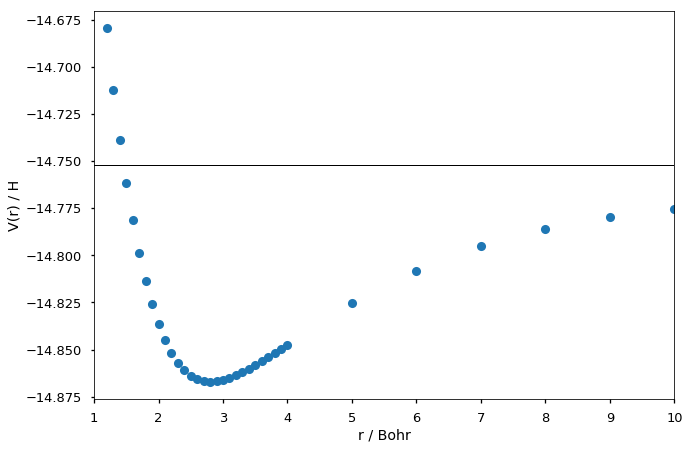

In [11]:
plt.plot(rs, es, 'o')
plt.axhline(es[-1], color='k', lw=1)
plt.ylabel("V(r) / H")
plt.xlabel("r / Bohr")
plt.xlim(1,10)

In [12]:
%%time
psi4.set_options({'reference':'ROHF'})
es_cc, wfns_cc = coord_scan(rs, Li2zmat, model='scf/sto-3g')

1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.0 5.0 6.0 7.0 8.0 9.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 50.0 55.0 60.0 65.0 70.0 
Finished
CPU times: user 13.3 s, sys: 536 ms, total: 13.8 s
Wall time: 14.6 s


(2, 15)

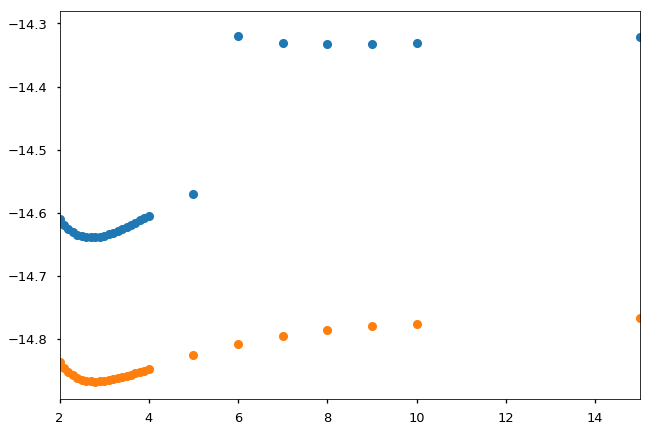

In [14]:
plt.plot(rs, es_cc, 'o')
plt.plot(rs, es, 'o')
plt.xlim(2,15)

In [ ]:
#psi4.core.be_quiet()
# restart logging with
# psi4.core.restart_outfile()

psi4.core.clean()

In [31]:
psi4.set_options({'reference':'ROHF'})
r = np.linspace(1.5, 4, 20)

hzmat = """
B
B 1 %s
"""
eh, w = coord_scan(r, hzmat, model='scf/6-31g*', wfn=False)

1.5 1.63157894737 1.76315789474 1.89473684211 2.02631578947 2.15789473684 2.28947368421 2.42105263158 2.55263157895 2.68421052632 2.81578947368 2.94736842105 3.07894736842 3.21052631579 3.34210526316 3.47368421053 3.60526315789 3.73684210526 3.86842105263 4.0 
Finished


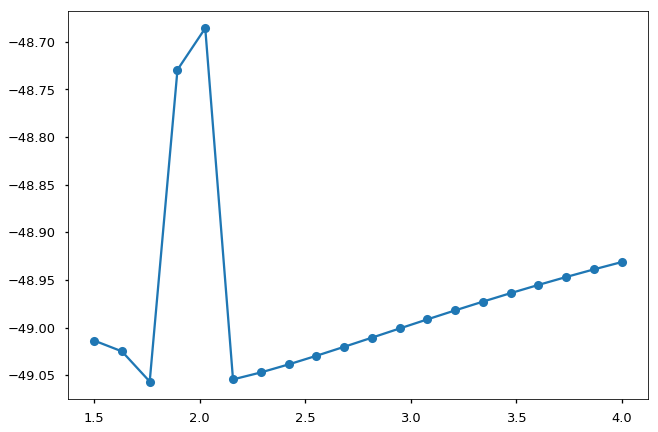

In [32]:
plt.plot(r, eh, 'o-')

#plt.xlim(10,)

In [11]:
psi4.set_output_file('test-out.dat', False)

In [12]:
mol = hzmat % 2.42105263158
psi4.geometry(mol)
psi4.energy('scf/6-31g*', mol=mol)

-49.03870929741153

In [13]:
mol = hzmat % 2.55263157

psi4.geometry(mol)
psi4.energy('scf/6-31g*', mol=mol)

-48.95992729695434

In [29]:
psi4.core.set_global_option('E_CONVERGENCE',1e-8)
psi4.core.set_global_option('D_CONVERGENCE', 1e-8)

True

In [30]:
psi4.core.get_global_option("E_CONVERGENCE"), psi4.core.get_global_option("D_CONVERGENCE")

(1e-08, 1e-08)

In [25]:
mol = hzmat % 2.42105263158
psi4.geometry(mol)
psi4.energy('scf/6-31g*', mol=mol)

-49.03870929741153